# Rwanda Revenue Authourity 
## Data Analytics Challenge

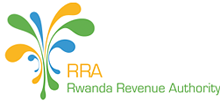



## Table Of Content

* Introduction
* Data Exploration
* Methodology

      

# Introduction: Problem Overview

Revenue collection is very crucial in every economy as this is the only way inwhich the government is able to raise funds for its daily operations.  One of themajor ways in which governments are able to generate revenue is through taxcollection.  In Rwanda,  some of the tax payment plans for businesses operat-ing in the region are value added tax,  pay as you earn,  withholding tax,  andconsumption tax [1].  Some of these taxes can be easily collected from payrollswhereby a percentage of an individual’s salary is withheld by the paying insti-tution and payment is made directly to RRA within 15 days of the paymentand some taxes collected at customs before goods are released [1].  According toa report on the international growth center, with the recent covid-19 situation,The national government faces significant losses in expected VAT and incometax  revenue,  while  local  government  also  faces  a  loss  in  revenue  from  variousfees [2].As part of the plan to digitize the current Revenue collection in Rwanda,this paper seeks to analyze Revenue collected in South Africa to come up witha proof of concept that will be used by the Rwanda revenue authority to collectits revenue more efficiently

# Data 

Based on our problem as stated above we will be using data that is related to the problem we have identified in order to come up with the final recommendation. The main things we will be focusing on are, 

* The estimated budget revenue
* collected revenue 
* and some sentiment data to understand people's reactions when these revenues are eventually collected

The sources for our data are the governement of South Africa's treasury site where we will be used to get data for the estimated revenue and the revenue that was eventually collected over a particular period of time and we will also be using the happiness index of South Africa within those years in order to get an idea of how the sentiments related to the budgeted revenue in those years. The happinness index data will be gotten from countryeconomy.com 

### Importing the libraries that will be used and loading the data

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
url = 'https://github.com/NatnaelAlemayehu/SA_TaxRevenue_Analysis/blob/main/SA_Main_budget_estimates_of_national_revenue.xlsx?raw=true'

In [82]:
taxData = pd.read_excel(url)

In [83]:
taxData

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,NaN,NaN,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
1,NaN,Personal income tax,NaN,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08
2,NaN,Tax on corporate income,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Corporate income tax,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08
4,NaN,NaN,Secondary tax on companies/dividend withholdin...,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Sales of capital assets,NaN,NaN,38785.0,230100.0,131244.0,3.626300e+04,3.544800e+04,1.147450e+05,9.446200e+04,3.700200e+04,7.743700e+04,1.211280e+05,1.713250e+05,8.374200e+04
95,Financial transactions in assets and liabiliti...,NaN,NaN,1739790.0,1296910.0,797067.0,9.570930e+05,4.226273e+06,9.758163e+06,1.396955e+07,1.595732e+07,1.533341e+07,4.338628e+07,1.680662e+07,1.728272e+07
96,TOTAL NON-TAX REVENUE *13,NaN,NaN,10843316.0,12692579.0,12616184.0,8.894421e+06,1.647399e+07,2.440151e+07,2.846770e+07,3.072584e+07,3.089958e+07,5.727367e+07,3.195705e+07,3.287996e+07
97,TOTAL MAIN BUDGET REVENUE,NaN,NaN,481196994.0,560794648.0,608795723.0,5.796845e+08,6.727515e+08,7.452913e+08,8.001422e+08,8.873662e+08,9.654569e+08,1.076234e+09,1.136891e+09,1.242417e+09


### Conducting an initial feature checks (head and tail of the data)

In [84]:
taxData.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,NaN,NaN,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
1,NaN,Personal income tax,NaN,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08
2,NaN,Tax on corporate income,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Corporate income tax,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08
4,NaN,NaN,Secondary tax on companies/dividend withholdin...,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07


In [85]:
taxData.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
94,Sales of capital assets,NaN,NaN,38785.0,230100.0,131244.0,3.626300e+04,3.544800e+04,1.147450e+05,9.446200e+04,3.700200e+04,7.743700e+04,1.211280e+05,1.713250e+05,8.374200e+04
95,Financial transactions in assets and liabiliti...,NaN,NaN,1739790.0,1296910.0,797067.0,9.570930e+05,4.226273e+06,9.758163e+06,1.396955e+07,1.595732e+07,1.533341e+07,4.338628e+07,1.680662e+07,1.728272e+07
96,TOTAL NON-TAX REVENUE *13,NaN,NaN,10843316.0,12692579.0,12616184.0,8.894421e+06,1.647399e+07,2.440151e+07,2.846770e+07,3.072584e+07,3.089958e+07,5.727367e+07,3.195705e+07,3.287996e+07
97,TOTAL MAIN BUDGET REVENUE,NaN,NaN,481196994.0,560794648.0,608795723.0,5.796845e+08,6.727515e+08,7.452913e+08,8.001422e+08,8.873662e+08,9.654569e+08,1.076234e+09,1.136891e+09,1.242417e+09
98,National Revenue Fund receipts,NaN,NaN,3438017.0,1849837.0,8203424.0,6.428749e+06,3.013914e+06,5.209227e+06,1.230279e+07,1.170934e+07,1.264697e+07,1.437752e+07,1.405000e+07,1.457800e+07


### Rename unnamed columns

In [86]:
taxData.rename(columns = {'Unnamed: 0': 'Main Category'}, inplace = True)

In [87]:
taxData.head(2)

,Main Category,Unnamed: 1,Unnamed: 2,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,NaN,NaN,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
1,NaN,Personal income tax,NaN,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08


In [88]:
taxData.rename(columns = {'Unnamed: 1': 'Sub Category'}, inplace = True)

In [89]:
taxData.head(2)

,Main Category,Sub Category,Unnamed: 2,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,NaN,NaN,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
1,NaN,Personal income tax,NaN,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08


In [90]:
taxData.rename(columns = {'Unnamed: 2': 'Sub Category Tax'}, inplace = True)

In [91]:
taxData.head(2)

,Main Category,Sub Category,Sub Category Tax,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,NaN,NaN,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
1,NaN,Personal income tax,NaN,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08


## Exploring the data

In [92]:
taxData.shape

(99, 15)

In [93]:
taxData.describe

<bound method NDFrame.describe of                                         Main Category  \
0                         Taxes on income and profits   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
94                            Sales of capital assets   
95  Financial transactions in assets and liabiliti...   
96                          TOTAL NON-TAX REVENUE *13   
97                         TOTAL MAIN BUDGET REVENUE    
98                     National Revenue Fund receipts   

               Sub Category  \
0                       NaN   
1       Personal income tax   
2   Tax on corporate income   
3                       NaN   
4                       NaN   
..                      ...   
94                      NaN   
95                      NaN   
96

### Dealing With Missing Vlaues

In [94]:
taxData.isnull()

,Main Category,Sub Category,Sub Category Tax,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,True,True,True,False,True,True,True,True,True
3,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
95,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
96,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
97,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False


In [95]:
taxData.isnull().sum()

Main Category       80
Sub Category        74
Sub Category Tax    45
2006/07             12
2007/08             14
2008/09              8
2009/10              7
2010/11              7
2011/12              8
2012/13              7
2013/14             18
2014/15             18
2015/16             18
2016/17             18
2017/18             18
dtype: int64

In [96]:
# Dropping rows where all row is empty
cleaned_taxData = taxData.drop(taxData.index[2])

In [97]:
cleaned_taxData.shape

(98, 15)

In [98]:
cleaned_taxData.head()

,Main Category,Sub Category,Sub Category Tax,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,NaN,NaN,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
1,NaN,Personal income tax,NaN,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08
3,NaN,NaN,Corporate income tax,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08
4,NaN,NaN,Secondary tax on companies/dividend withholdin...,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07
5,NaN,NaN,Interest withholding tax,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.185404e+05,4.500000e+05,4.798445e+05


In [99]:
cleaned_taxData.isnull().sum(axis=1)

0     2
1     2
3     2
4     2
5     8
     ..
94    2
95    2
96    2
97    2
98    2
Length: 98, dtype: int64

In [100]:
cleaned_taxData.head()

,Main Category,Sub Category,Sub Category Tax,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,NaN,NaN,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
1,NaN,Personal income tax,NaN,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08
3,NaN,NaN,Corporate income tax,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08
4,NaN,NaN,Secondary tax on companies/dividend withholdin...,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07
5,NaN,NaN,Interest withholding tax,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.185404e+05,4.500000e+05,4.798445e+05


In [101]:
cleaned_taxData.dtypes

Main Category        object
Sub Category         object
Sub Category Tax     object
2006/07             float64
2007/08             float64
2008/09             float64
2009/10             float64
2010/11             float64
2011/12             float64
2012/13             float64
2013/14             float64
2014/15             float64
2015/16             float64
2016/17             float64
2017/18             float64
dtype: object

In [102]:

cleaned_taxData['New Main Category'] = cleaned_taxData['Main Category'].fillna('') + cleaned_taxData['Sub Category'].fillna('')

In [103]:
cleaned_taxData.head()

,Main Category,Sub Category,Sub Category Tax,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,New Main Category
0,Taxes on income and profits,NaN,NaN,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08,Taxes on income and profits
1,NaN,Personal income tax,NaN,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08,Personal income tax
3,NaN,NaN,Corporate income tax,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08,
4,NaN,NaN,Secondary tax on companies/dividend withholdin...,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07,
5,NaN,NaN,Interest withholding tax,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.185404e+05,4.500000e+05,4.798445e+05,


In [104]:
cleaned_taxData.drop(cleaned_taxData.columns[[0,1]], axis=1, inplace=True)

In [105]:
cleaned_taxData.head()

,Sub Category Tax,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,New Main Category
0,NaN,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08,Taxes on income and profits
1,NaN,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08,Personal income tax
3,Corporate income tax,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08,
4,Secondary tax on companies/dividend withholdin...,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07,
5,Interest withholding tax,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.185404e+05,4.500000e+05,4.798445e+05,


In [106]:
cleaned_taxData['New Main Category'] = cleaned_taxData['New Main Category'].fillna('') + cleaned_taxData['Sub Category Tax'].fillna('')

In [107]:
cleaned_taxData.columns

Index(['Sub Category Tax', '2006/07', '2007/08', '2008/09', '2009/10',
       '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16',
       '2016/17', '2017/18', 'New Main Category'],
      dtype='object')

In [108]:
del cleaned_taxData['Sub Category Tax']

In [109]:
cleaned_taxData.head()

,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,New Main Category
0,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08,Taxes on income and profits
1,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08,Personal income tax
3,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08,Corporate income tax
4,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07,Secondary tax on companies/dividend withholdin...
5,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.185404e+05,4.500000e+05,4.798445e+05,Interest withholding tax


In [110]:
cleaned_taxData.columns

Index(['2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       'New Main Category'],
      dtype='object')

In [111]:
old_cols = cleaned_taxData.columns.values 
new_cols= ['New Main Category', '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       ]
cleaned_taxData = cleaned_taxData.reindex(columns=new_cols)

In [112]:
cleaned_taxData.head(10)

,New Main Category,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
1,Personal income tax,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08
3,Corporate income tax,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08
4,Secondary tax on companies/dividend withholdin...,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07
5,Interest withholding tax,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.185404e+05,4.500000e+05,4.798445e+05
6,Tax on retirement funds,3190529.0,285357.0,143251.0,4.269921e+04,2.772101e+03,6.665255e+03,1.594370e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,Other,0.0,0.0,0.0,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
8,Interest on overdue income tax,1931050.0,2280507.0,2776988.0,3.433025e+06,2.904485e+06,2.585012e+06,2.493543e+06,3.290755e+06,2.663840e+06,3.410974e+06,3.522346e+06,3.654675e+06
9,Small business tax amnesty,657.0,12828.0,51627.0,7.288773e+04,2.908036e+04,3.302822e+02,5.971446e+02,1.249838e+03,2.827441e+03,2.759206e+03,3.271800e+03,3.487604e+03
10,Taxes on payroll and workforce,5597401.0,6330917.0,7327463.0,7.804829e+06,8.652340e+06,1.017313e+07,1.137848e+07,1.247560e+07,1.403212e+07,1.522016e+07,1.546217e+07,1.664146e+07


In [113]:
#Dropping Rows that have more than 5 NAN values
cleaned_taxData.dropna(thresh=5)

,New Main Category,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
1,Personal income tax,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08
3,Corporate income tax,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08
4,Secondary tax on companies/dividend withholdin...,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07
5,Interest withholding tax,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.185404e+05,4.500000e+05,4.798445e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Sales of capital assets,38785.0,230100.0,131244.0,3.626300e+04,3.544800e+04,1.147450e+05,9.446200e+04,3.700200e+04,7.743700e+04,1.211280e+05,1.713250e+05,8.374200e+04
95,Financial transactions in assets and liabiliti...,1739790.0,1296910.0,797067.0,9.570930e+05,4.226273e+06,9.758163e+06,1.396955e+07,1.595732e+07,1.533341e+07,4.338628e+07,1.680662e+07,1.728272e+07
96,TOTAL NON-TAX REVENUE *13,10843316.0,12692579.0,12616184.0,8.894421e+06,1.647399e+07,2.440151e+07,2.846770e+07,3.072584e+07,3.089958e+07,5.727367e+07,3.195705e+07,3.287996e+07
97,TOTAL MAIN BUDGET REVENUE,481196994.0,560794648.0,608795723.0,5.796845e+08,6.727515e+08,7.452913e+08,8.001422e+08,8.873662e+08,9.654569e+08,1.076234e+09,1.136891e+09,1.242417e+09


In [114]:
cleaned_taxData.isnull().any(axis=1)

0     False
1     False
3     False
4     False
5      True
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 98, dtype: bool

In [115]:

cleaned_taxData.reset_index(drop=True, inplace=True)

In [116]:
cleaned_taxData = cleaned_taxData.dropna(thresh=cleaned_taxData.shape[1]-4)

In [117]:
cleaned_taxData.set_index('New Main Category')

,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
New Main Category,,,,,,,,,,,,
Taxes on income and profits,279990516.0,332058296.0,383482732.0,3.590448e+08,3.799412e+08,4.265837e+08,4.573138e+08,5.077592e+08,5.617898e+08,6.068205e+08,6.605856e+08,7.391526e+08
Personal income tax,140578347.0,168774352.0,195115008.0,2.051450e+08,2.269250e+08,2.503996e+08,2.758216e+08,3.098341e+08,3.529504e+08,3.881024e+08,4.258100e+08,4.820859e+08
Corporate income tax,118998582.0,140119831.0,165378278.0,1.348834e+08,1.329017e+08,1.516267e+08,1.592592e+08,1.773243e+08,1.849254e+08,1.911516e+08,2.050900e+08,2.186918e+08
Secondary tax on companies/dividend withholding tax,15291351.0,20585421.0,20017580.0,1.546780e+07,1.717819e+07,2.196541e+07,1.973871e+07,1.730879e+07,2.124729e+07,2.393423e+07,2.571000e+07,3.423692e+07
Tax on retirement funds,3190529.0,285357.0,143251.0,4.269921e+04,2.772101e+03,6.665255e+03,1.594370e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
Sales of capital assets,38785.0,230100.0,131244.0,3.626300e+04,3.544800e+04,1.147450e+05,9.446200e+04,3.700200e+04,7.743700e+04,1.211280e+05,1.713250e+05,8.374200e+04
Financial transactions in assets and liabilities *12,1739790.0,1296910.0,797067.0,9.570930e+05,4.226273e+06,9.758163e+06,1.396955e+07,1.595732e+07,1.533341e+07,4.338628e+07,1.680662e+07,1.728272e+07
TOTAL NON-TAX REVENUE *13,10843316.0,12692579.0,12616184.0,8.894421e+06,1.647399e+07,2.440151e+07,2.846770e+07,3.072584e+07,3.089958e+07,5.727367e+07,3.195705e+07,3.287996e+07


In [118]:
list_null = cleaned_taxData.isnull().sum(axis=1).tolist()

In [119]:
new_list = []
for index, value in  enumerate(list_null):
  if value> 0:
    new_list.append(index)
new_list

[9, 16, 17, 18, 34, 46, 60, 61, 62, 67, 68, 69]

In [120]:
trial_final_df = cleaned_taxData.fillna(cleaned_taxData.mean(axis=1).T, axis=0)

In [121]:
final_taxData = cleaned_taxData.T.fillna(cleaned_taxData.mean(axis=1)).T

In [122]:

final_taxData.isnull().sum()

New Main Category    0
2006/07              0
2007/08              0
2008/09              0
2009/10              0
2010/11              0
2011/12              0
2012/13              0
2013/14              0
2014/15              0
2015/16              0
2016/17              0
2017/18              0
dtype: int64

In [123]:
final_taxData.corr()

""


In [124]:
final_taxData

,New Main Category,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,2.79991e+08,3.32058e+08,3.83483e+08,3.59045e+08,3.79941e+08,4.26584e+08,4.57314e+08,5.07759e+08,5.6179e+08,6.06821e+08,6.60586e+08,7.39153e+08
1,Personal income tax,1.40578e+08,1.68774e+08,1.95115e+08,2.05145e+08,2.26925e+08,2.504e+08,2.75822e+08,3.09834e+08,3.5295e+08,3.88102e+08,4.2581e+08,4.82086e+08
2,Corporate income tax,1.18999e+08,1.4012e+08,1.65378e+08,1.34883e+08,1.32902e+08,1.51627e+08,1.59259e+08,1.77324e+08,1.84925e+08,1.91152e+08,2.0509e+08,2.18692e+08
3,Secondary tax on companies/dividend withholdin...,1.52914e+07,2.05854e+07,2.00176e+07,1.54678e+07,1.71782e+07,2.19654e+07,1.97387e+07,1.73088e+07,2.12473e+07,2.39342e+07,2.571e+07,3.42369e+07
5,Tax on retirement funds,3.19053e+06,285357,143251,42699.2,2772.1,6665.25,159.437,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Sales of capital assets,38785,230100,131244,36263,35448,114745,94462,37002,77437,121128,171325,83742
94,Financial transactions in assets and liabiliti...,1.73979e+06,1.29691e+06,797067,957093,4.22627e+06,9.75816e+06,1.39695e+07,1.59573e+07,1.53334e+07,4.33863e+07,1.68066e+07,1.72827e+07
95,TOTAL NON-TAX REVENUE *13,1.08433e+07,1.26926e+07,1.26162e+07,8.89442e+06,1.6474e+07,2.44015e+07,2.84677e+07,3.07258e+07,3.08996e+07,5.72737e+07,3.1957e+07,3.288e+07
96,TOTAL MAIN BUDGET REVENUE,4.81197e+08,5.60795e+08,6.08796e+08,5.79684e+08,6.72751e+08,7.45291e+08,8.00142e+08,8.87366e+08,9.65457e+08,1.07623e+09,1.13689e+09,1.24242e+09


In [125]:
df = pd.DataFrame(data=final_taxData)

In [126]:
row = df.iloc[[76]]

In [127]:
row

,New Main Category,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
96,TOTAL MAIN BUDGET REVENUE,4.81197e+08,5.60795e+08,6.08796e+08,5.79684e+08,6.72751e+08,7.45291e+08,8.00142e+08,8.87366e+08,9.65457e+08,1.07623e+09,1.13689e+09,1.24242e+09


In [128]:
del row['New Main Category']

Text(0, 0.5, 'Revenue Collected')

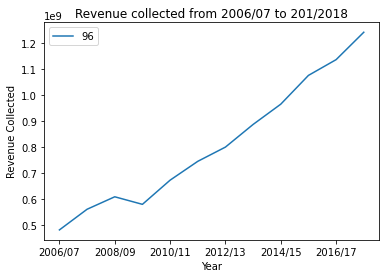

In [129]:
row.T.plot()
plt.title('Revenue collected from 2006/07 to 201/2018')
plt.xlabel('Year')
plt.ylabel('Revenue Collected')

In [130]:
import matplotlib.pyplot as plt


In [131]:
final_taxData.head()

,New Main Category,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
0,Taxes on income and profits,2.79991e+08,3.32058e+08,3.83483e+08,3.59045e+08,3.79941e+08,4.26584e+08,4.57314e+08,5.07759e+08,5.6179e+08,6.06821e+08,6.60586e+08,7.39153e+08
1,Personal income tax,1.40578e+08,1.68774e+08,1.95115e+08,2.05145e+08,2.26925e+08,2.504e+08,2.75822e+08,3.09834e+08,3.5295e+08,3.88102e+08,4.2581e+08,4.82086e+08
2,Corporate income tax,1.18999e+08,1.4012e+08,1.65378e+08,1.34883e+08,1.32902e+08,1.51627e+08,1.59259e+08,1.77324e+08,1.84925e+08,1.91152e+08,2.0509e+08,2.18692e+08
3,Secondary tax on companies/dividend withholdin...,1.52914e+07,2.05854e+07,2.00176e+07,1.54678e+07,1.71782e+07,2.19654e+07,1.97387e+07,1.73088e+07,2.12473e+07,2.39342e+07,2.571e+07,3.42369e+07
5,Tax on retirement funds,3.19053e+06,285357,143251,42699.2,2772.1,6665.25,159.437,0,0,0,0,0


In [132]:
transposed_df = final_taxData
transposed_df.rename(columns ={'New Main Category' : 'Year'}, inplace=True)
transposed_df.set_index('Year', inplace=True)
transposed_df.head()

,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
Year,,,,,,,,,,,,
Taxes on income and profits,2.79991e+08,3.32058e+08,3.83483e+08,3.59045e+08,3.79941e+08,4.26584e+08,4.57314e+08,5.07759e+08,5.6179e+08,6.06821e+08,6.60586e+08,7.39153e+08
Personal income tax,1.40578e+08,1.68774e+08,1.95115e+08,2.05145e+08,2.26925e+08,2.504e+08,2.75822e+08,3.09834e+08,3.5295e+08,3.88102e+08,4.2581e+08,4.82086e+08
Corporate income tax,1.18999e+08,1.4012e+08,1.65378e+08,1.34883e+08,1.32902e+08,1.51627e+08,1.59259e+08,1.77324e+08,1.84925e+08,1.91152e+08,2.0509e+08,2.18692e+08
Secondary tax on companies/dividend withholding tax,1.52914e+07,2.05854e+07,2.00176e+07,1.54678e+07,1.71782e+07,2.19654e+07,1.97387e+07,1.73088e+07,2.12473e+07,2.39342e+07,2.571e+07,3.42369e+07
Tax on retirement funds,3.19053e+06,285357,143251,42699.2,2772.1,6665.25,159.437,0,0,0,0,0


In [133]:
transposed_df = transposed_df.T

In [134]:
transposed_df

Year,Taxes on income and profits,Personal income tax,Corporate income tax,Secondary tax on companies/dividend withholding tax,Tax on retirement funds,Interest on overdue income tax,Small business tax amnesty,Taxes on payroll and workforce,Skills development levy,Payroll levy,...,Other,Mineral and petroleum royalties *9,Mining leases and ownership *10,"Royalties, prospecting fees and surface rental *11",Land rent,Sales of capital assets,Financial transactions in assets and liabilities *12,TOTAL NON-TAX REVENUE *13,TOTAL MAIN BUDGET REVENUE,National Revenue Fund receipts
2006/07,2.79991e+08,1.40578e+08,1.18999e+08,1.52914e+07,3.19053e+06,1.93105e+06,657,5.5974e+06,5.5974e+06,0.0909091,...,26016.6,0,-33506,188485,4481,38785,1.73979e+06,1.08433e+07,4.81197e+08,3.43802e+06
2007/08,3.32058e+08,1.68774e+08,1.4012e+08,2.05854e+07,285357,2.28051e+06,12828,6.33092e+06,6.33092e+06,0,...,26016.6,3.88385e+06,55916,244101,12185,230100,1.29691e+06,1.26926e+07,5.60795e+08,1.84984e+06
2008/09,3.83483e+08,1.95115e+08,1.65378e+08,2.00176e+07,143251,2.77699e+06,51627,7.32746e+06,7.32746e+06,0,...,26016.6,0,708413,255680,13636,131244,797067,1.26162e+07,6.08796e+08,8.20342e+06
2009/10,3.59045e+08,2.05145e+08,1.34883e+08,1.54678e+07,42699.2,3.43302e+06,72887.7,7.80483e+06,7.80483e+06,0,...,26016.6,0,633125,210579,10235,36263,957093,8.89442e+06,5.79684e+08,6.42875e+06
2010/11,3.79941e+08,2.26925e+08,1.32902e+08,1.71782e+07,2772.1,2.90448e+06,29080.4,8.65234e+06,8.65234e+06,0,...,50000,3.55472e+06,860238,21744,11773.9,35448,4.22627e+06,1.6474e+07,6.72751e+08,3.01391e+06
2011/12,4.26584e+08,2.504e+08,1.51627e+08,2.19654e+07,6665.25,2.58501e+06,330.282,1.01731e+07,1.01731e+07,0,...,0,5.61154e+06,79732,89193,6054.32,114745,9.75816e+06,2.44015e+07,7.45291e+08,5.20923e+06
2012/13,4.57314e+08,2.75822e+08,1.59259e+08,1.97387e+07,159.437,2.49354e+06,597.145,1.13785e+07,1.13785e+07,1,...,156900,5.02614e+06,0,87001,9707,94462,1.39695e+07,2.84677e+07,8.00142e+08,1.23028e+07
2013/14,5.07759e+08,3.09834e+08,1.77324e+08,1.73088e+07,0,3.29075e+06,1249.84,1.24756e+07,1.24756e+07,0,...,0,6.43925e+06,99777.3,104850,3851,37002,1.59573e+07,3.07258e+07,8.87366e+08,1.17093e+07
2014/15,5.6179e+08,3.5295e+08,1.84925e+08,2.12473e+07,0,2.66384e+06,2827.44,1.40321e+07,1.40321e+07,0,...,0,5.42201e+06,33038.4,31698,2622,77437,1.53334e+07,3.08996e+07,9.65457e+08,1.2647e+07
2015/16,6.06821e+08,3.88102e+08,1.91152e+08,2.39342e+07,0,3.41097e+06,2759.21,1.52202e+07,1.52202e+07,0,...,291,3.7079e+06,35489.5,22240,6222,121128,4.33863e+07,5.72737e+07,1.07623e+09,1.43775e+07


In [135]:
transposed_df.corr()

""


In [136]:
transposed_df.columns

Index(['Taxes on income and profits', 'Personal income tax',
       'Corporate income tax',
       'Secondary tax on companies/dividend withholding tax',
       'Tax on retirement funds ', 'Interest on overdue income tax ',
       'Small business tax amnesty', 'Taxes on payroll and workforce',
       'Skills development levy', 'Payroll levy', 'Taxes on property',
       'Donations tax ', 'Estate duty ', 'Securities transfer tax *1',
       'Transfer duties ', 'Domestic taxes on goods and services',
       'Domestic VAT', 'Import VAT', 'Refunds', 'Beer',
       'Sorghum beer and sorghum flour', 'Wine and other fermented beverages',
       'Spirits', 'Cigarettes and cigarette tobacco',
       'Pipe tobacco and cigars', 'Petroleum products *2',
       'Revenue from neighbouring countries *3', 'Ad valorem excise duties',
       'General fuel levy', 'Air departure tax ', 'Plastic bags levy',
       'Electricity levy', 'Incandescent light bulb levy',
       'CO2 tax - motor vehicle emissions

In [137]:
transposed_df['Taxes on income and profits']

2006/07    2.79991e+08
2007/08    3.32058e+08
2008/09    3.83483e+08
2009/10    3.59045e+08
2010/11    3.79941e+08
2011/12    4.26584e+08
2012/13    4.57314e+08
2013/14    5.07759e+08
2014/15     5.6179e+08
2015/16    6.06821e+08
2016/17    6.60586e+08
2017/18    7.39153e+08
Name: Taxes on income and profits, dtype: object

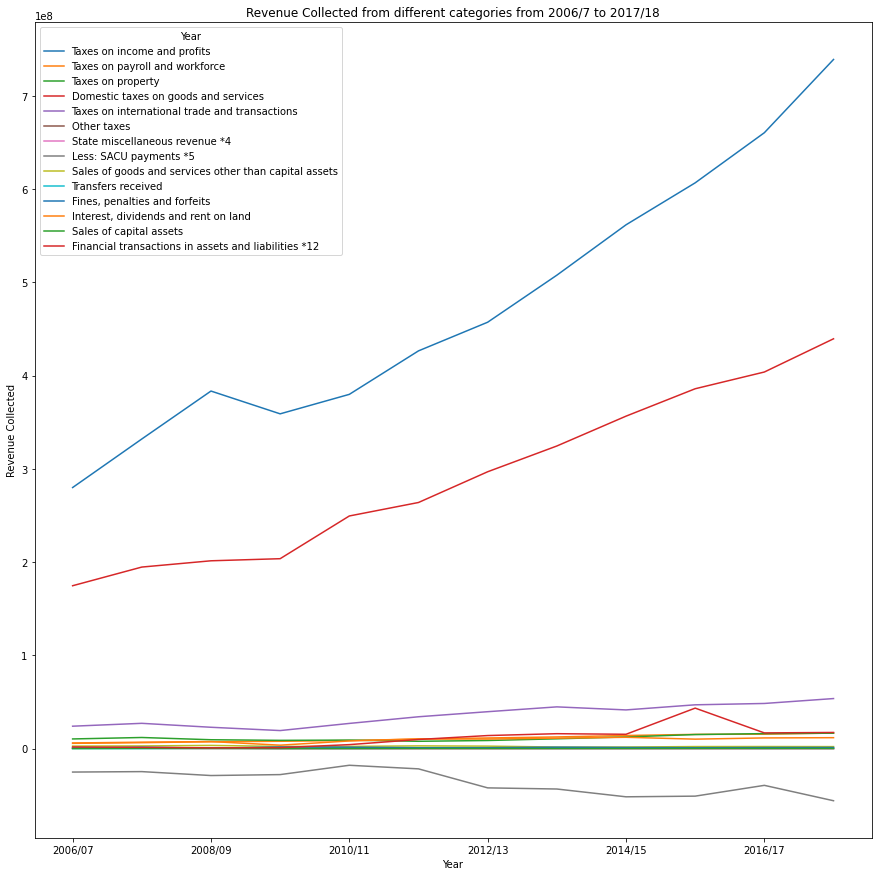

In [138]:
# generating line graph based on the different categories
transposed_df[['Taxes on income and profits', 'Taxes on payroll and workforce', 'Taxes on property', 'Domestic taxes on goods and services', 'Taxes on international trade and transactions', 'Other taxes', 'State miscellaneous revenue *4', 'Less: SACU payments *5', 'Sales of goods and services other than capital assets', 'Transfers received', 'Fines, penalties and forfeits', 'Interest, dividends and rent on land', 'Sales of capital assets', 'Financial transactions in assets and liabilities *12']].plot(figsize=(15,15))
plt.title('Revenue Collected from different categories from 2006/7 to 2017/18')
plt.xlabel('Year')
plt.ylabel('Revenue Collected')
plt.show()

In [189]:
df2 = pd.DataFrame(data=final_taxData)

In [190]:
df2.head(10)

,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
Year,,,,,,,,,,,,
Taxes on income and profits,2.79991e+08,3.32058e+08,3.83483e+08,3.59045e+08,3.79941e+08,4.26584e+08,4.57314e+08,5.07759e+08,5.6179e+08,6.06821e+08,6.60586e+08,7.39153e+08
Personal income tax,1.40578e+08,1.68774e+08,1.95115e+08,2.05145e+08,2.26925e+08,2.504e+08,2.75822e+08,3.09834e+08,3.5295e+08,3.88102e+08,4.2581e+08,4.82086e+08
Corporate income tax,1.18999e+08,1.4012e+08,1.65378e+08,1.34883e+08,1.32902e+08,1.51627e+08,1.59259e+08,1.77324e+08,1.84925e+08,1.91152e+08,2.0509e+08,2.18692e+08
Secondary tax on companies/dividend withholding tax,1.52914e+07,2.05854e+07,2.00176e+07,1.54678e+07,1.71782e+07,2.19654e+07,1.97387e+07,1.73088e+07,2.12473e+07,2.39342e+07,2.571e+07,3.42369e+07
Tax on retirement funds,3.19053e+06,285357,143251,42699.2,2772.1,6665.25,159.437,0,0,0,0,0
Interest on overdue income tax,1.93105e+06,2.28051e+06,2.77699e+06,3.43302e+06,2.90448e+06,2.58501e+06,2.49354e+06,3.29075e+06,2.66384e+06,3.41097e+06,3.52235e+06,3.65467e+06
Small business tax amnesty,657,12828,51627,72887.7,29080.4,330.282,597.145,1249.84,2827.44,2759.21,3271.8,3487.6
Taxes on payroll and workforce,5.5974e+06,6.33092e+06,7.32746e+06,7.80483e+06,8.65234e+06,1.01731e+07,1.13785e+07,1.24756e+07,1.40321e+07,1.52202e+07,1.54622e+07,1.66415e+07
Skills development levy,5.5974e+06,6.33092e+06,7.32746e+06,7.80483e+06,8.65234e+06,1.01731e+07,1.13785e+07,1.24756e+07,1.40321e+07,1.52202e+07,1.54622e+07,1.66415e+07


In [201]:
newData = df2.iloc[[1,2,3,5,6], 0:12]

In [202]:
newData

,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
Year,,,,,,,,,,,,
Personal income tax,1.40578e+08,1.68774e+08,1.95115e+08,2.05145e+08,2.26925e+08,2.504e+08,2.75822e+08,3.09834e+08,3.5295e+08,3.88102e+08,4.2581e+08,4.82086e+08
Corporate income tax,1.18999e+08,1.4012e+08,1.65378e+08,1.34883e+08,1.32902e+08,1.51627e+08,1.59259e+08,1.77324e+08,1.84925e+08,1.91152e+08,2.0509e+08,2.18692e+08
Secondary tax on companies/dividend withholding tax,1.52914e+07,2.05854e+07,2.00176e+07,1.54678e+07,1.71782e+07,2.19654e+07,1.97387e+07,1.73088e+07,2.12473e+07,2.39342e+07,2.571e+07,3.42369e+07
Interest on overdue income tax,1.93105e+06,2.28051e+06,2.77699e+06,3.43302e+06,2.90448e+06,2.58501e+06,2.49354e+06,3.29075e+06,2.66384e+06,3.41097e+06,3.52235e+06,3.65467e+06
Small business tax amnesty,657,12828,51627,72887.7,29080.4,330.282,597.145,1249.84,2827.44,2759.21,3271.8,3487.6


Text(0, 0.5, 'Value')

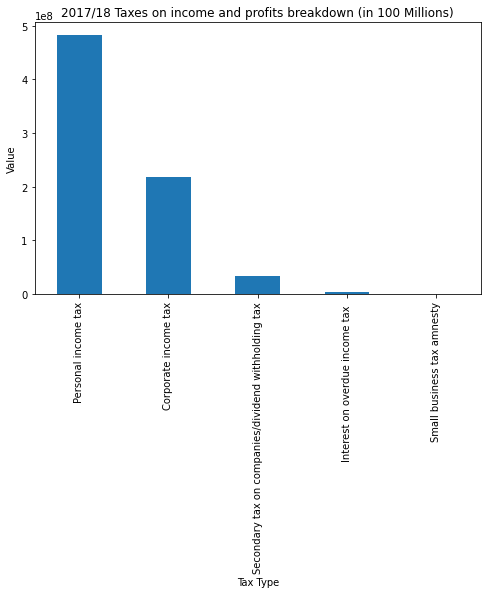

In [203]:
newData['2017/18'].plot.bar( figsize=(8, 5))
plt.title("2017/18 Taxes on income and profits breakdown (in 100 Millions)")
plt.xlabel('Tax Type')
plt.ylabel('Value')

## Importing Happinness Data

This is mainly to check if there in any correletion between the happiness index in those years and the Main budget revenue

In [143]:
# Adding sentiment data to the dataset fro final analysis
SA_df = pd.read_csv('https://raw.githubusercontent.com/Roland-coder/Hamoye-Internship/master/South%20Africa-World%20Happiness%20Index%20-%20Sheet1.csv')


In [144]:
SA_df.head()

,Date,World Happinness Ranking,World Happinness Index
0,2007,106.166667,4.723167
1,2008,108.200000,4.675200
2,2009,107.000000,4.683500
3,2010,104.000000,4.758333
4,2011,105.500000,4.723000


In [145]:
SA_df.shape

(12, 3)

In [146]:
transposed_df.shape

(12, 78)

In [147]:
SA_df.dtypes

Date                          int64
World Happinness Ranking    float64
World Happinness Index      float64
dtype: object

<AxesSubplot:xlabel='Date'>

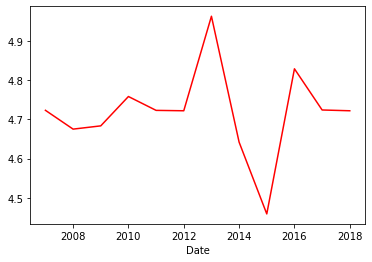

In [170]:
plot_df = SA_df['World Happinness Index']
plot_df.plot(color='r')

In [148]:
# Concatenating the two datasets
SA_ha = [4.723166667, 4.6752, 4.6835, 4.758333333, 4.723, 4.722, 4.963, 4.642, 4.459, 4.829, 4.724, 4.722]
data = transposed_df['TOTAL MAIN BUDGET REVENUE ']
headers = ['TOTAL MAIN BUDGET REVENUE ', 'World Happinness Index']
combined_df = pd.DataFrame(list(zip(data,SA_ha)), columns = headers)
combined_df.head()

,TOTAL MAIN BUDGET REVENUE,World Happinness Index
0,4.811970e+08,4.723167
1,5.607946e+08,4.675200
2,6.087957e+08,4.683500
3,5.796845e+08,4.758333
4,6.727515e+08,4.723000


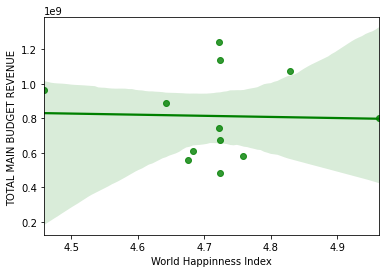

In [149]:
import seaborn as sns

ax = sns.regplot(x=combined_df['World Happinness Index'], y=combined_df['TOTAL MAIN BUDGET REVENUE '],  color='g')

In [152]:
transposed_df['World Happinness Index'] = SA_ha
transposed_df.head()

Year,Taxes on income and profits,Personal income tax,Corporate income tax,Secondary tax on companies/dividend withholding tax,Tax on retirement funds,Interest on overdue income tax,Small business tax amnesty,Taxes on payroll and workforce,Skills development levy,Payroll levy,...,Mineral and petroleum royalties *9,Mining leases and ownership *10,"Royalties, prospecting fees and surface rental *11",Land rent,Sales of capital assets,Financial transactions in assets and liabilities *12,TOTAL NON-TAX REVENUE *13,TOTAL MAIN BUDGET REVENUE,National Revenue Fund receipts,World Happinness Index
2006/07,2.79991e+08,1.40578e+08,1.18999e+08,1.52914e+07,3.19053e+06,1.93105e+06,657,5.5974e+06,5.5974e+06,0.0909091,...,0,-33506,188485,4481,38785,1.73979e+06,1.08433e+07,4.81197e+08,3.43802e+06,4.723167
2007/08,3.32058e+08,1.68774e+08,1.4012e+08,2.05854e+07,285357,2.28051e+06,12828,6.33092e+06,6.33092e+06,0,...,3.88385e+06,55916,244101,12185,230100,1.29691e+06,1.26926e+07,5.60795e+08,1.84984e+06,4.675200
2008/09,3.83483e+08,1.95115e+08,1.65378e+08,2.00176e+07,143251,2.77699e+06,51627,7.32746e+06,7.32746e+06,0,...,0,708413,255680,13636,131244,797067,1.26162e+07,6.08796e+08,8.20342e+06,4.683500
2009/10,3.59045e+08,2.05145e+08,1.34883e+08,1.54678e+07,42699.2,3.43302e+06,72887.7,7.80483e+06,7.80483e+06,0,...,0,633125,210579,10235,36263,957093,8.89442e+06,5.79684e+08,6.42875e+06,4.758333
2010/11,3.79941e+08,2.26925e+08,1.32902e+08,1.71782e+07,2772.1,2.90448e+06,29080.4,8.65234e+06,8.65234e+06,0,...,3.55472e+06,860238,21744,11773.9,35448,4.22627e+06,1.6474e+07,6.72751e+08,3.01391e+06,4.723000


In [ ]:
sns.pairplot(transposed_df)
# sns_plot.savefig("pairplot.png")

# plt.clf() # Clean parirplot figure from sns 
# Image(filename='pairplot.png')

# Methodology 

Our main focus in this project was to identify insights that will help us come up with a recommendation that can be used by the Rwanda Revenue Authority, We did this by using thev following steps
***
_Firstly, we collected the data we needed from the different sources, in order to make sure we had global access to these data, we hosted them on a github repository so that they are always available from the cloud_
***

***
_Secondly, we imported the different datasets, cleaned them, dealt with the missing values to make sure they were okay for data analysis_
***

***
_Lastly, we performed exploratory data analysis on the different data sets to see how we could eventually get insights from it_

***